In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import time 
import os 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score

In [ ]:
# load the npz file
data_path = '/content/drive/MyDrive/QI/train_compiled.npz'
train_data   = np.load(data_path, mmap_mode='r')
for k in train_data.files:
  print(k)

x_data
y_data


In [ ]:
x_data_train = train_data['x_data']
y_data_train = train_data['y_data']

In [ ]:
# load the npz file
data_path_test = '/content/drive/MyDrive/QI/test_compiled.npz'
test_data   = np.load(data_path_test, mmap_mode='r')
for k in test_data.files:
  print(k)

x_data
y_data


In [ ]:
x_data_test = test_data['x_data']
y_data_test = test_data['y_data']

In [ ]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(x_data_train, y_data_train)
pred = model.predict(x_data_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_data_test,pred))
print('Precision: ', precision_score(y_data_test,pred))
print('Recall: ', recall_score(y_data_test,pred))
print('F1 Score: ', f1_score(y_data_test,pred))
print('Area under the curve: ', roc_auc_score(y_data_test,pred))

Accuracy:  0.9001623376623377
Precision:  0.8822222222222222
Recall:  0.8501070663811563
F1 Score:  0.8658669574700109
Area under the curve:  0.8904130103147612


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_data_test,pred).ravel()

print("true negative", tn)
print("false positive", fp)
print("false negative", fn)
print("true positive", tp)
specificity = tn / (tn+fp)
print("specificity is {}".format(specificity))

true negative 712
false positive 53
false negative 70
true positive 397
specificity is 0.930718954248366


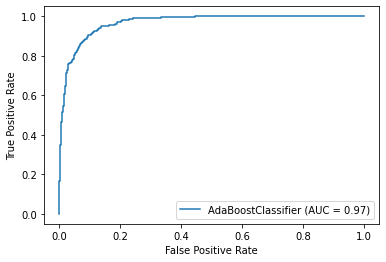

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
plot_roc_curve(model, x_data_test, y_data_test)

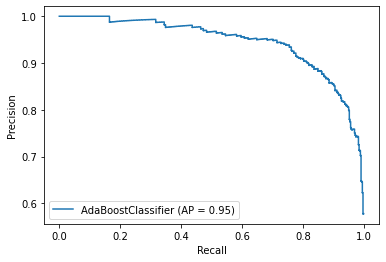

In [ ]:
plot_precision_recall_curve(model, x_data_test, y_data_test)

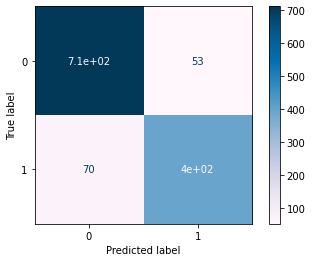

In [ ]:
plot_confusion_matrix(model, x_data_test, y_data_test, cmap='PuBu')